In [58]:
# Bibliotheken abrufen
import json
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [59]:
# URL als Variable definieren
url = "https://rodare.hzdr.de/api/records/?page=1&sort=mostrecent&size=1000"

In [60]:
# Funktion um Inhalt aus URL in r zu speichern
r = requests.get(url)

In [61]:
# JSON lesen lassen
json = r.json()

In [62]:
# Dictionary anlegen und Keys der gewünschten Werte definieren
Meta_dict = {}
Meta_dict['type'] = []
Meta_dict['license'] = []
Meta_dict['related_identifier'] = []
Meta_dict['publication_date'] = []
Meta_dict['Access_Right'] = []
Meta_dict['Downloads'] = []
Meta_dict['unique_downloads'] = []
Meta_dict['unique_views'] = []
Meta_dict['views'] = []

In [63]:
# Definition einer Teilliste und for-Schleife, um den type der Records aus allen Einträgen auszulesen und aufzulisten
for record in json['hits']['hits']:
    Meta_dict['type'].append(record['metadata']['resource_type']['type'])
    if 'license' in record['metadata'].keys():
        Meta_dict['license'].append(record['metadata']['license']['id'])
    else:
        Meta_dict['license'].append('NaN')
# Neue Iteration in Liste der related identifier anlegen und dort die Bedigungen für das Auslesen definieren
    count_id = 0
    for identifier in record['metadata']['related_identifiers']:
        if identifier['relation'] == 'isReferencedBy' and 'hzdr' in identifier['identifier']:
            count_id = count_id + 1
    Meta_dict['related_identifier'].append(count_id)
    Meta_dict['publication_date'].append(record['created'][:10])
    Meta_dict['Access_Right'].append(record['metadata']['access_right'])
    Meta_dict['Downloads'].append(int(record['stats']['downloads']))
    Meta_dict['unique_downloads'].append(int(record['stats']['unique_downloads']))
    Meta_dict['unique_views'].append(int(record['stats']['unique_views']))
    Meta_dict['views'].append(int(record['stats']['views']))

In [64]:
# Umwandlung der Liste in ein DataFrame 
df = pd.DataFrame(Meta_dict)

In [65]:
df

,type,license,related_identifier,publication_date,Access_Right,Downloads,unique_downloads,unique_views,views
0,dataset,NaN,1,2021-08-06,restricted,0,0,0,0
1,dataset,CC-BY-4.0,1,2021-08-05,open,1,1,4,4
2,image,NaN,1,2021-08-05,closed,0,0,2,3
3,dataset,CC-BY-4.0,0,2021-08-05,open,2,2,3,3
4,dataset,CC-BY-4.0,1,2021-08-05,open,0,0,3,3
...,...,...,...,...,...,...,...,...,...
263,dataset,CC-BY-SA-4.0,0,2018-05-09,open,23,22,340,402
264,dataset,CC-BY-4.0,0,2018-04-25,open,90,33,346,420
265,dataset,CC-BY-4.0,0,2018-04-12,open,23,18,286,343
266,dataset,NaN,0,2018-03-20,restricted,0,0,255,288


In [9]:
print(df['Downloads'].sum())

18271


In [10]:
df.describe(include='all')

,type,license,related_identifier,publication_date,Access_Right,Downloads,unique_downloads,unique_views,views
count,268,268,268.000000,268,268,268.000000,268.000000,268.000000,268.000000
unique,6,10,NaN,188,4,NaN,NaN,NaN,NaN
top,dataset,CC-BY-4.0,NaN,2021-03-10,open,NaN,NaN,NaN,NaN
freq,205,123,NaN,17,151,NaN,NaN,NaN,NaN
mean,NaN,NaN,0.615672,NaN,NaN,68.175373,24.429104,95.589552,138.712687
std,NaN,NaN,0.494972,NaN,NaN,230.718052,64.340319,101.009787,127.850200
min,NaN,NaN,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,0.000000,NaN,NaN,0.000000,0.000000,41.000000,62.000000
50%,NaN,NaN,1.000000,NaN,NaN,5.000000,4.000000,67.500000,106.000000
75%,NaN,NaN,1.000000,NaN,NaN,37.250000,20.000000,99.250000,157.500000


In [11]:
df.shape

(268, 9)

In [45]:
sorted_df = df.sort_values(by='publication_date', ascending=False)
print(sorted_df)

        type       license  related_identifier publication_date Access_Right  \
10   dataset     CC-BY-4.0                   1       2022-01-01    embargoed   
4    dataset     CC-BY-4.0                   1       2021-08-05         open   
1    dataset     CC-BY-4.0                   1       2021-08-05         open   
3    dataset     CC-BY-4.0                   0       2021-08-04         open   
0    dataset           NaN                   1       2021-08-03   restricted   
..       ...           ...                 ...              ...          ...   
263  dataset  CC-BY-SA-4.0                   0       2018-05-09         open   
264  dataset     CC-BY-4.0                   0       2018-04-25         open   
265  dataset     CC-BY-4.0                   0       2018-04-12         open   
266  dataset           NaN                   0       2018-03-20   restricted   
267    image     CC-BY-4.0                   0       2018-02-28         open   

     Downloads  unique_downloads  uniqu

In [70]:
df['publication_date'] >= '2021-01-01'

0       True
1       True
2       True
3       True
4       True
       ...  
263    False
264    False
265    False
266    False
267    False
Name: publication_date, Length: 268, dtype: bool

In [83]:
# zurück kommt boolarray
start = list(df['publication_date'] >= '2021-01-01')
end = list(df['publication_date'] <= '2021-03-31')
date_filter = np.all(np.array([start,end]),axis=0)
#end
date_filter

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [69]:
# zurück kommt boolarray
df['publication_date'].all(df['publication_date'] >= '2021-01-01',df['publication_date'] <= '2021-03-31')

TypeError: 'Series' objects are mutable, thus they cannot be hashed

In [43]:
sortet_list = list(df['publication_date'][df['publication_date'] >= '2021-01-01'])
sortet_list

['2021-08-03',
 '2021-08-05',
 '2021-08-03',
 '2021-08-04',
 '2021-08-05',
 '2021-08-02',
 '2021-07-31',
 '2021-07-30',
 '2021-07-30',
 '2021-07-21',
 '2022-01-01',
 '2021-07-05',
 '2021-07-13',
 '2021-07-03',
 '2021-07-01',
 '2021-07-01',
 '2021-06-22',
 '2021-06-23',
 '2021-06-08',
 '2021-05-31',
 '2021-05-27',
 '2021-05-25',
 '2021-04-23',
 '2021-05-21',
 '2021-05-21',
 '2021-01-28',
 '2021-05-03',
 '2021-05-03',
 '2021-05-03',
 '2021-04-30',
 '2021-04-29',
 '2021-04-30',
 '2021-04-19',
 '2021-04-29',
 '2021-04-01',
 '2021-04-19',
 '2021-01-12',
 '2021-04-21',
 '2021-04-08',
 '2021-04-16',
 '2021-04-13',
 '2021-04-15',
 '2021-04-13',
 '2021-04-07',
 '2021-01-20',
 '2021-04-01',
 '2021-04-01',
 '2021-03-31',
 '2021-03-29',
 '2021-03-23',
 '2021-03-11',
 '2021-01-28',
 '2021-03-17',
 '2021-03-15',
 '2021-03-15',
 '2021-03-15',
 '2021-03-10',
 '2021-03-10',
 '2021-03-10',
 '2021-03-10',
 '2021-03-10',
 '2021-03-10',
 '2021-03-10',
 '2021-03-10',
 '2021-03-10',
 '2021-03-10',
 '2021-03-

In [44]:
sortet_list.sort()
sortet_list

['2021-01-04',
 '2021-01-05',
 '2021-01-06',
 '2021-01-06',
 '2021-01-06',
 '2021-01-07',
 '2021-01-07',
 '2021-01-08',
 '2021-01-12',
 '2021-01-12',
 '2021-01-20',
 '2021-01-22',
 '2021-01-22',
 '2021-01-23',
 '2021-01-28',
 '2021-01-28',
 '2021-01-28',
 '2021-01-28',
 '2021-01-28',
 '2021-01-29',
 '2021-01-29',
 '2021-01-31',
 '2021-01-31',
 '2021-02-08',
 '2021-02-08',
 '2021-02-08',
 '2021-02-09',
 '2021-02-11',
 '2021-02-18',
 '2021-02-23',
 '2021-02-24',
 '2021-02-25',
 '2021-03-01',
 '2021-03-02',
 '2021-03-04',
 '2021-03-08',
 '2021-03-09',
 '2021-03-10',
 '2021-03-10',
 '2021-03-10',
 '2021-03-10',
 '2021-03-10',
 '2021-03-10',
 '2021-03-10',
 '2021-03-10',
 '2021-03-10',
 '2021-03-10',
 '2021-03-10',
 '2021-03-10',
 '2021-03-10',
 '2021-03-10',
 '2021-03-10',
 '2021-03-10',
 '2021-03-10',
 '2021-03-11',
 '2021-03-15',
 '2021-03-15',
 '2021-03-15',
 '2021-03-17',
 '2021-03-23',
 '2021-03-29',
 '2021-03-31',
 '2021-04-01',
 '2021-04-01',
 '2021-04-01',
 '2021-04-07',
 '2021-04-

In [41]:
list(df['publication_date'][df['publication_date'] >= '2021-01-01']).sort()

In [54]:
df.dtypes

type                  object
license               object
related_identifier     int64
publication_date      object
Access_Right          object
Downloads              int64
unique_downloads       int64
unique_views           int64
views                  int64
dtype: object

In [13]:
df.columns

Index(['type', 'license', 'related_identifier', 'publication_date',
       'Access_Right', 'Downloads', 'unique_downloads', 'unique_views',
       'views'],
      dtype='object')

In [14]:
len(df)

268

In [15]:
df['type'].value_counts()

dataset         205
software         24
image            15
other            13
video             6
presentation      5
Name: type, dtype: int64

In [16]:
df['type'].value_counts(normalize=True)

dataset         0.764925
software        0.089552
image           0.055970
other           0.048507
video           0.022388
presentation    0.018657
Name: type, dtype: float64

In [17]:
type_mode = df['type'].mode()
type_mode[0]

'dataset'

In [18]:
df['related_identifier'].isna().sum()

0

In [19]:
df['Downloads'].mean()

68.17537313432835

In [20]:
df['Downloads'].median()

5.0

In [21]:
df['Downloads'].var()

53230.81931633971

In [22]:
df['Downloads'].std()

230.71805156151026

In [23]:
df['Downloads'].max()

2074

In [24]:
df['Downloads'].min()

0

In [25]:
df['Downloads'].corr(df['views'])

0.44843647614460463

In [26]:
df['views'].mean()

138.71268656716418

In [27]:
df['views'].median()

106.0

In [28]:
# Nur den Mittelwert etc. eines bestimmten Zetabschnittes errechnen lassen?
# Wie eine Printausgabe in eine Datei schreiben lassen bei Ausführung des Programmes?

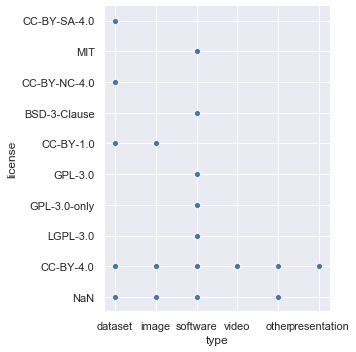

In [29]:
sns.relplot(x='type', y='license', data=df)

In [30]:
#plt.savefig('../type_license.png', dpi=150)

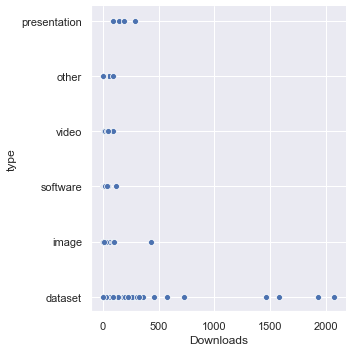

In [31]:
sns.relplot(y='type', x='Downloads', data=df)

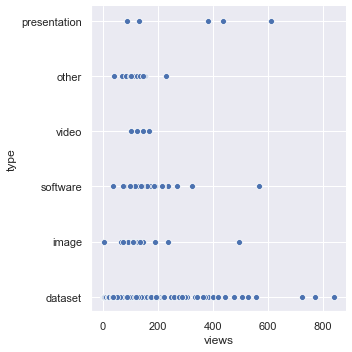

In [32]:
sns.relplot(y='type', x='views', data=df)

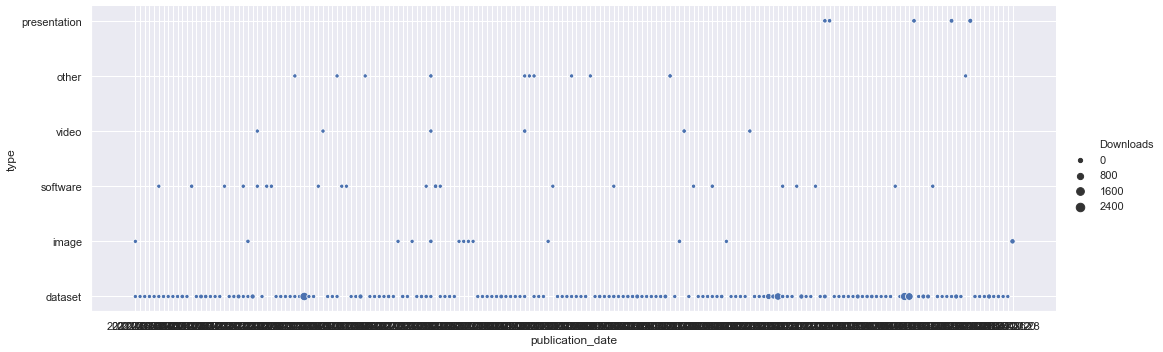

In [33]:
#Problem: Wie kann ich hier nur bestimmte Daten zb 2021 in die Darstellung einbringen?
sns.relplot(x='publication_date', y='type', 
            size='Downloads',
            #row='license', 
            #col='license', 
            data=df,
            height=5, aspect=3)

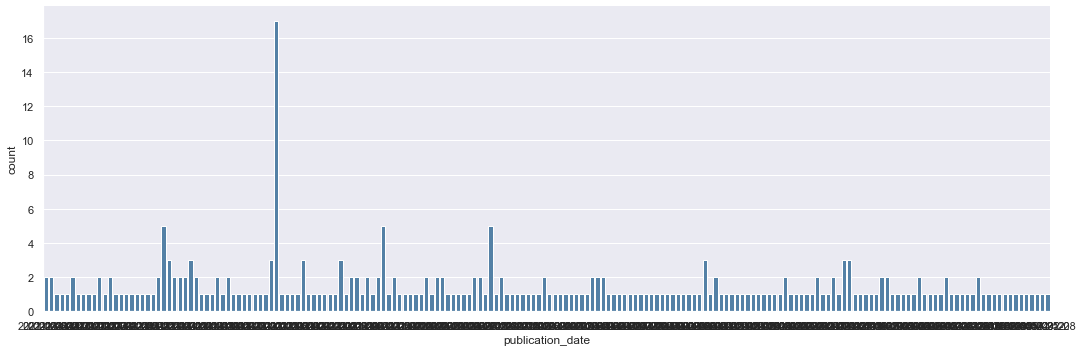

In [34]:
sns.catplot(x='publication_date',
            data=df, kind='count', color="steelblue", height=5, aspect=3)

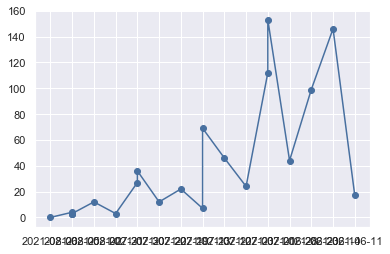

In [66]:
plt.plot(df['publication_date'][df['publication_date'] >= '2021-06-01'], df['views'][df['publication_date'] >= '2021-06-01'], color='#4870a0', marker='o')

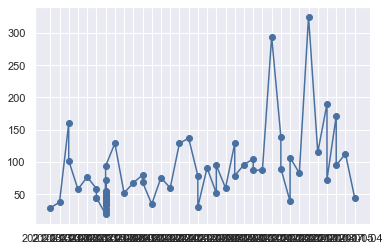

In [84]:
plt.plot(df['publication_date'][date_filter], df['views'][date_filter], color='#4870a0', marker='o')

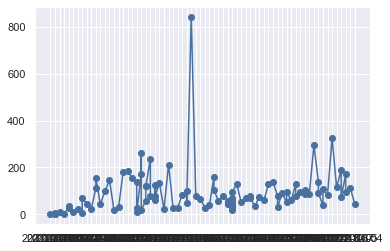

In [85]:
start_date = '2021-01-01'
plt.plot(df['publication_date'][df['publication_date'] >= start_date], df['views'][df['publication_date'] >= start_date], color='#4870a0', marker='o')

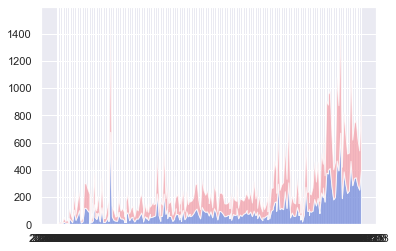

In [86]:
plt.stackplot(df['publication_date'], 
              df['unique_views'], 
              df['views'],
              alpha=0.75,
              colors=['#7289da','#f29fa9'],
              labels=['unique_views', 'views'])